## Final Project Submission

Please fill out:
* Student name: Michael Orlando, Brian Choi
* Student pace: Full time
* Scheduled project review date/time: 3/11/2022
* Instructor name: Praveen Gowtham

# Microsoft Studio Movie Analysis


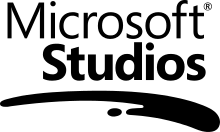

## Overview

This project analyzes the data from IMDB and The Numbers. The IMDB data consisted of general information such as the movie titles, release dates, actor and director information, etc. The Numbers data consisted of budgets and gross earnings. Microsoft Studios can use this data to discover the most profitable way to enter into the movie market.

## Business Problem

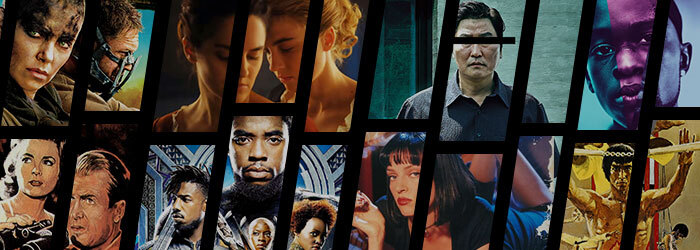

Microsoft Studios desires to enter into the film industry with the most optimal roadplan possible. This movie data analysis' aim is to provide Microsoft Studios with conclusions to their relevant questions.

## Data Understanding

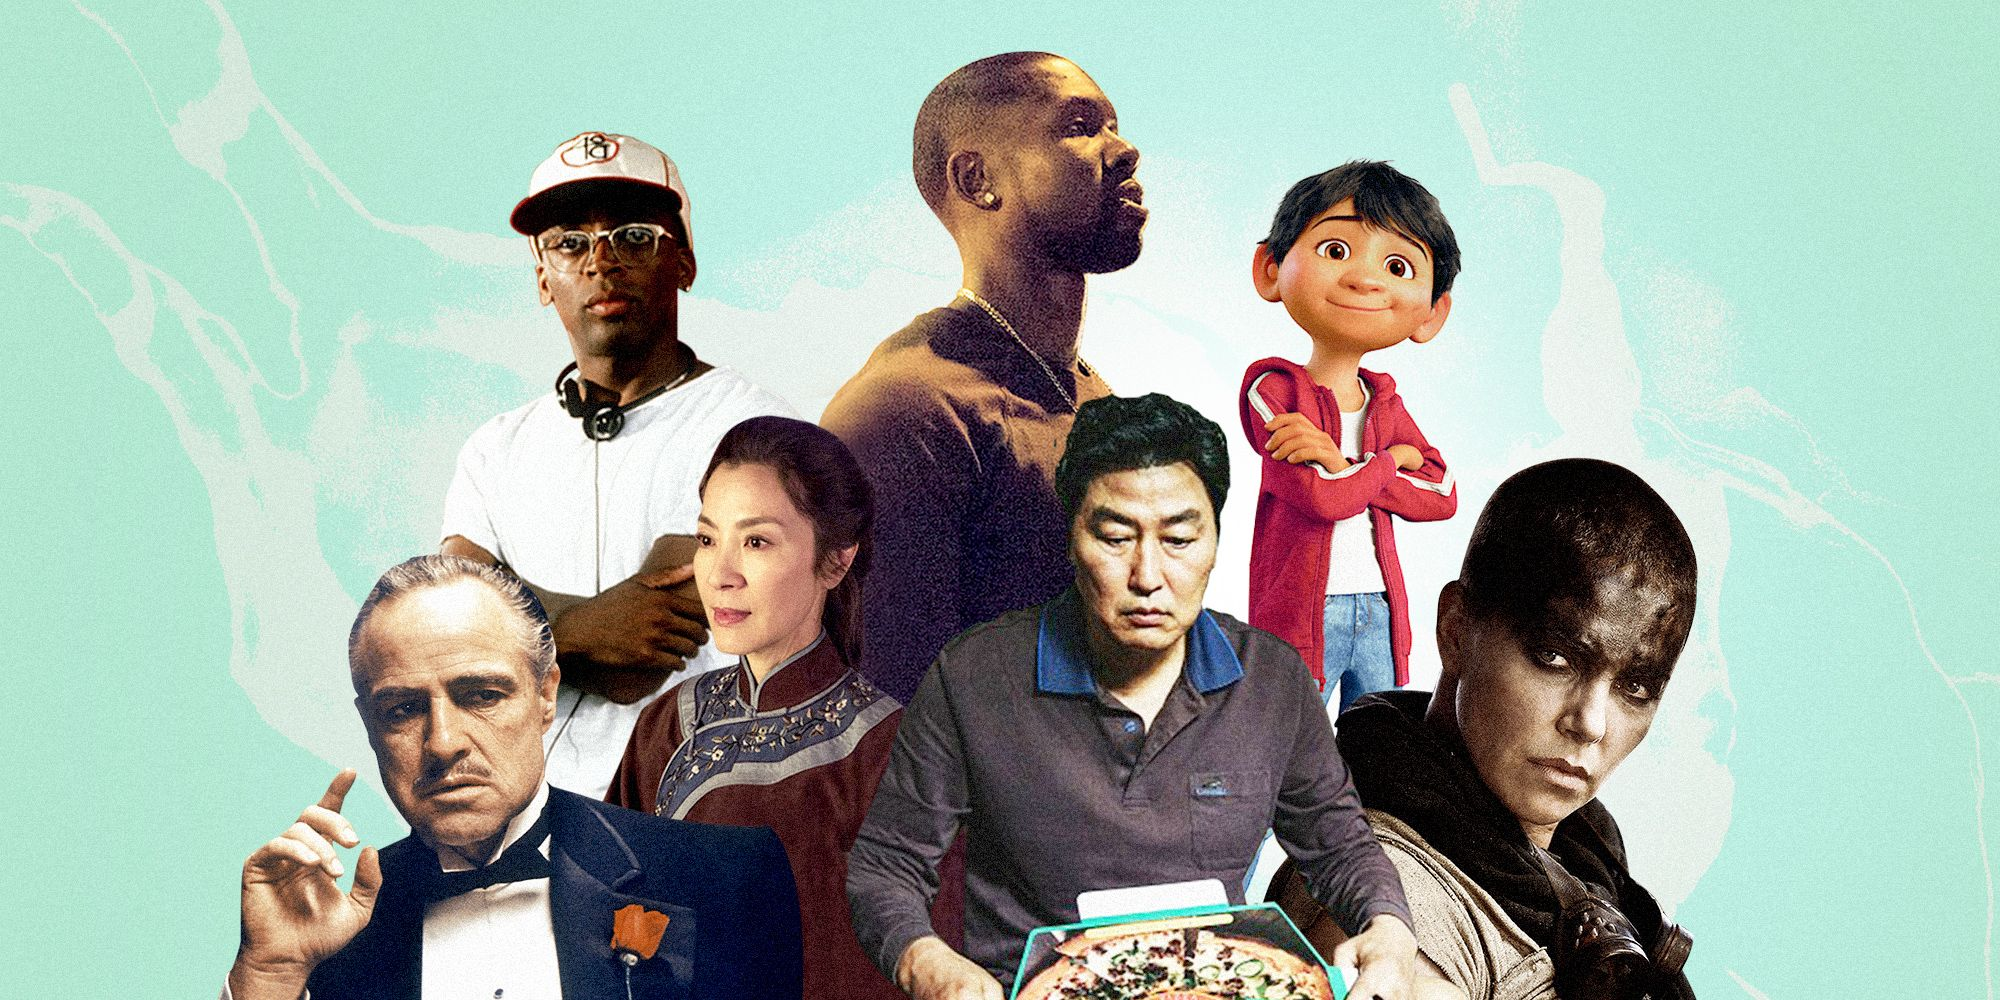

The IMDB database has unique IDs for each movie and persons associated with the film projects. In addition to the data from the Numbers, we were able to merge the data and calcuate the Return on Investment (ROI) for each movie. The data loaded below is saved as Pandas Dataframes in which analysis was conducted on.


In [1]:
#loaded in appropriate modules

import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline



In [2]:
#connecting to imdb database
conn = sqlite3.connect('zippedData/im.db')

#created a table query
table_name_query = """SELECT name 
                      AS 'Table Names' 
                      FROM sqlite_master 
                      WHERE type='table';"""


pd.read_sql(table_name_query, conn)

Table Names
0   movie_basics
1      directors
2      known_for
3     movie_akas
4  movie_ratings
5        persons
6     principals
7        writers

In [3]:
#loaded in database of movie_basics joined with movie_ratings joined with movie_akas

df = pd.read_sql("""

SELECT *
FROM movie_basics
JOIN movie_ratings
    USING(movie_id)
JOIN movie_akas
    USING(movie_id)


""", conn)

In [4]:
df.head()

movie_id primary_title original_title  start_year  runtime_minutes  \
0  tt0063540     Sunghursh      Sunghursh        2013            175.0   
1  tt0063540     Sunghursh      Sunghursh        2013            175.0   
2  tt0063540     Sunghursh      Sunghursh        2013            175.0   
3  tt0063540     Sunghursh      Sunghursh        2013            175.0   
4  tt0063540     Sunghursh      Sunghursh        2013            175.0   

               genres  averagerating  numvotes  ordering      title region  \
0  Action,Crime,Drama            7.0        77         1  Sangharsh     IN   
1  Action,Crime,Drama            7.0        77         2  Sunghursh   None   
2  Action,Crime,Drama            7.0        77         3  Sunghursh     IN   
3  Action,Crime,Drama            7.0        77         4  Sunghursh     IN   
4  Action,Crime,Drama            7.0        77         5  Sungharsh     IN   

  language     types                   attributes  is_original_title  
0       hi      None  alternative transliteration                0.0  
1     None  original                         None                1.0  
2     None      None                         None                0.0  
3       hi      None  alternative transliteration                0.0  
4       hi      None         alternative spelling                0.0

In [5]:
#loaded in budgets csv file
df2 = pd.read_csv('zippedData/tn.movie_budgets.csv.gz', compression='gzip')

In [6]:
df2.head()

id  release_date                                        movie  \
0   1  Dec 18, 2009                                       Avatar   
1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2   3   Jun 7, 2019                                 Dark Phoenix   
3   4   May 1, 2015                      Avengers: Age of Ultron   
4   5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   

  production_budget domestic_gross worldwide_gross  
0      $425,000,000   $760,507,625  $2,776,345,279  
1      $410,600,000   $241,063,875  $1,045,663,875  
2      $350,000,000    $42,762,350    $149,762,350  
3      $330,600,000   $459,005,868  $1,403,013,963  
4      $317,000,000   $620,181,382  $1,316,721,747

# Data Cleaning

In [7]:
#dropped duplicates and unnecessary columns for data analysis
df.drop_duplicates(subset=['movie_id'], inplace=True)
df.drop(columns=['primary_title', 'original_title', 'ordering', 'region', 'types', 'attributes', 'is_original_title'], inplace=True)

In [8]:
df2.rename(columns={'movie': 'title'}, inplace=True)

In [9]:
merged = df.merge(df2, on='title')

In [10]:
merged.head()

movie_id  start_year  runtime_minutes                   genres  \
0  tt0339736        2017             98.0                   Horror   
1  tt0393049        2010             98.0     Comedy,Drama,Romance   
2  tt0426566        2012              NaN                    Drama   
3  tt0436230        2010              NaN          Horror,Thriller   
4  tt0437086        2019            122.0  Action,Adventure,Sci-Fi   

   averagerating  numvotes                title language  id  release_date  \
0            5.6      2420             Whiplash     None  43  Oct 10, 2014   
1            5.5       106     Anderson's Cross     None  65  Dec 31, 2010   
2            6.0        13            Breakdown     None  11   May 2, 1997   
3            6.7        34     The Devil Inside     None  12   Jan 6, 2012   
4            7.5     88207  Alita: Battle Angel     None  24  Feb 14, 2019   

  production_budget domestic_gross worldwide_gross  
0        $3,300,000    $13,092,006     $38,969,037  
1          $300,000             $0              $0  
2       $36,000,000    $50,159,144     $50,159,144  
3        $1,000,000    $53,262,945    $101,759,490  
4      $170,000,000    $85,710,210    $402,976,036

In [11]:
#changing values in merged.genres to lists and dropping more unneccessary columns
merged.genres = merged.genres.str.split(',')
merged.dropna(subset=['genres'], inplace=True)
merged.drop(columns=['language'], inplace=True)

In [12]:
merged.drop_duplicates(subset=['movie_id'], inplace=True)

In [13]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1171 entries, 0 to 1227
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           1171 non-null   object 
 1   start_year         1171 non-null   int64  
 2   runtime_minutes    1080 non-null   float64
 3   genres             1171 non-null   object 
 4   averagerating      1171 non-null   float64
 5   numvotes           1171 non-null   int64  
 6   title              1171 non-null   object 
 7   id                 1171 non-null   int64  
 8   release_date       1171 non-null   object 
 9   production_budget  1171 non-null   object 
 10  domestic_gross     1171 non-null   object 
 11  worldwide_gross    1171 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 118.9+ KB


## Feature Engineering

We created a unique genre list in which we created new columns where binary was used to indicated if a certain movie fit a genre.

In [14]:
#creating an unique genre list

genre_columns = []

for i in merged.genres:
    for x in i:
        genre_columns.append(x)

genre_columns = list(set(genre_columns))

genre_columns

['Animation',
 'Sport',
 'Sci-Fi',
 'Biography',
 'Adventure',
 'Fantasy',
 'Crime',
 'Action',
 'Family',
 'News',
 'Thriller',
 'Music',
 'Documentary',
 'Romance',
 'War',
 'Musical',
 'Comedy',
 'Horror',
 'History',
 'Drama',
 'Mystery',
 'Western']

In [15]:
def binary_genres(lst, genre):   
    """
    
    This function takes two arguments: the list of genres from the movie.genre column in each row
    and a specify genre. Ex: binary_genres(['Comedy', 'Drama'], 'Comedy')
    
    Returns 1 if genre in lst
    Returns 0 if genre not in lst
    
    
    """
    
    if genre in lst:
        return 1
    else:
        return 0
    
#looping through genre columns to apply binary_genres function to add new columns
for i in genre_columns:
    merged[i] = merged.genres.apply(lambda x: binary_genres(x, i))

In [16]:
merged

movie_id  start_year  runtime_minutes                       genres  \
0     tt0339736        2017             98.0                     [Horror]   
1     tt0393049        2010             98.0     [Comedy, Drama, Romance]   
2     tt0426566        2012              NaN                      [Drama]   
3     tt0436230        2010              NaN           [Horror, Thriller]   
4     tt0437086        2019            122.0  [Action, Adventure, Sci-Fi]   
...         ...         ...              ...                          ...   
1223  tt8266310        2019            117.0   [Biography, Comedy, Drama]   
1224  tt8450662        2018             66.0                [Documentary]   
1225  tt8632862        2018            128.0                [Documentary]   
1226  tt8816388        2018             28.0                [Documentary]   
1227  tt9024106        2019            106.0           [Biography, Drama]   

      averagerating  numvotes                 title  id  release_date  \
0               5.6      2420              Whiplash  43  Oct 10, 2014   
1               5.5       106      Anderson's Cross  65  Dec 31, 2010   
2               6.0        13             Breakdown  11   May 2, 1997   
3               6.7        34      The Devil Inside  12   Jan 6, 2012   
4               7.5     88207   Alita: Battle Angel  24  Feb 14, 2019   
...             ...       ...                   ...  ..           ...   
1223            6.2       173  Blinded by the Light  64  Aug 14, 2019   
1224            7.3        22               Beloved  65  Oct 16, 1998   
1225            6.7     11628       Fahrenheit 11/9  29  Sep 21, 2018   
1226            5.7         7               Demonic  56  Oct 10, 2017   
1227            6.3      5945             Unplanned  33  Mar 29, 2019   

     production_budget  ... Documentary Romance  War  Musical  Comedy  Horror  \
0           $3,300,000  ...           0       0    0        0       0       1   
1             $300,000  ...           0       1    0        0       1       0   
2          $36,000,000  ...           0       0    0        0       0       0   
3           $1,000,000  ...           0       0    0        0       0       1   
4         $170,000,000  ...           0       0    0        0       0       0   
...                ...  ...         ...     ...  ...      ...     ...     ...   
1223       $15,000,000  ...           0       0    0        0       1       0   
1224       $53,000,000  ...           1       0    0        0       0       0   
1225        $5,000,000  ...           1       0    0        0       0       0   
1226        $3,000,000  ...           1       0    0        0       0       0   
1227        $6,000,000  ...           0       0    0        0       0       0   

      History  Drama  Mystery  Western  
0           0      0        0        0  
1           0      1        0        0  
2           0      1        0        0  
3           0      0        0        0  
4           0      0        0        0  
...       ...    ...      ...      ...  
1223        0      1        0        0  
1224        0      0        0        0  
1225        0      0        0        0  
1226        0      0        0        0  
1227        0      1        0        0  

[1171 rows x 34 columns]

## Data Manipulation

We calculated Return on Investment (ROI) by this formula:0 (world gross - budget  / budget)

In [17]:
#converting production_budget type from str -> float
merged.production_budget = merged['production_budget'].str.strip('$')
merged.production_budget = merged['production_budget'].str.replace(',', '')
merged.production_budget = merged.production_budget.astype('float')

In [18]:
#converting worldwide_gross type from str -> float
merged.worldwide_gross = merged['worldwide_gross'].str.strip('$')
merged.worldwide_gross = merged['worldwide_gross'].str.replace(',', '')
merged.worldwide_gross = merged.worldwide_gross.astype('float')

In [19]:
#converting domestic_gross type from str -> float
merged.domestic_gross = merged['domestic_gross'].str.strip('$')
merged.domestic_gross = merged['domestic_gross'].str.replace(',', '')
merged.domestic_gross = merged.domestic_gross.astype('float')

In [20]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1171 entries, 0 to 1227
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           1171 non-null   object 
 1   start_year         1171 non-null   int64  
 2   runtime_minutes    1080 non-null   float64
 3   genres             1171 non-null   object 
 4   averagerating      1171 non-null   float64
 5   numvotes           1171 non-null   int64  
 6   title              1171 non-null   object 
 7   id                 1171 non-null   int64  
 8   release_date       1171 non-null   object 
 9   production_budget  1171 non-null   float64
 10  domestic_gross     1171 non-null   float64
 11  worldwide_gross    1171 non-null   float64
 12  Animation          1171 non-null   int64  
 13  Sport              1171 non-null   int64  
 14  Sci-Fi             1171 non-null   int64  
 15  Biography          1171 non-null   int64  
 16  Adventure          1171 

In [21]:
#created a dataframe without zero values for worldwide_gross and domestic_gross

main_df = merged[(merged.worldwide_gross != 0) & (merged.domestic_gross != 0)]

In [22]:
#calculated return on investment (ROI) for movies-- worldwide and domestic 
#metric to measure the rate of return on money budgeted for production 

main_df['ROI_worldwide'] = ((main_df.worldwide_gross - main_df.production_budget)/ main_df.production_budget) *100
main_df['ROI_domestic'] = ((main_df.domestic_gross - main_df.production_budget)/ main_df.production_budget) *100

In [23]:
#calcuated gross profit margin for movies -- worldwide and domestic
#assess how efficiently the company generates profit from sales of products

main_df['gross_profit_margin_worldwide'] = ((main_df.worldwide_gross - main_df.production_budget)/ main_df.worldwide_gross
                                           )*100
main_df['gross_profit_margin_domestic'] = ((main_df.domestic_gross - main_df.production_budget)/ main_df.domestic_gross
                                           )*100

In [24]:
#returns number of genres as a column where values takes the length of list in genres column
main_df['num_of_genres'] = main_df.genres.apply(lambda x: len(x))

In [25]:
#dropping duplicates
main_df.drop_duplicates(subset=['movie_id'], inplace=True)

#  Analysis of Genres

### -Does number of genres of a movie affect its return on investment (ROI)

### -Does the type of genre of a movie affect its ROI?

In [26]:
#grouped dataframe by number of genres of each movie

grouped_by_num_of_genres = main_df.groupby(['num_of_genres']).mean()
num_genres_roi = grouped_by_num_of_genres['ROI_worldwide']
num_genres_roi

num_of_genres
1    228.784231
2    421.433392
3    357.856805
Name: ROI_worldwide, dtype: float64

## Single or Multi Genre Movie Analysis

In our dataset, there are movies descirbed by 1, 2, or 3 genres. We compared the amount of genres and their Average ROI to see if there was a clear statiscal difference, in other words, an advantage to making a movie that fits to more than one genre.

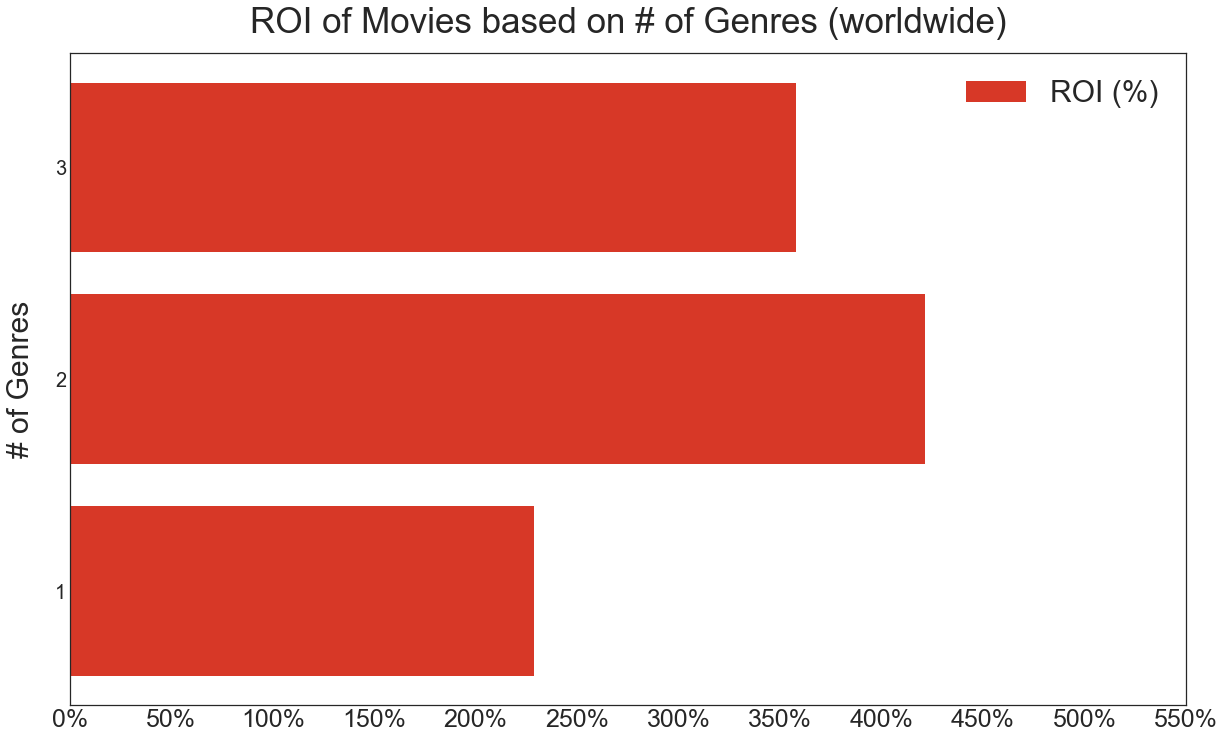

In [27]:
#horizontal barplot of ROI by number of genres

plt.style.use('seaborn-white')

fig, ax = plt.subplots(figsize=(20,12))



ax.barh(num_genres_roi.index, list(num_genres_roi), color='#D73827')
ax.set_title('ROI of Movies based on # of Genres (worldwide)', fontsize=35, pad=20)


ax.set_ylabel("# of Genres", fontsize=30)
ax.set_yticks([1,2,3])
ax.set_yticklabels([1,2,3], fontsize=20)
ax.yaxis.labelpad = 20

ax.set_xticks(range(0,600,50))
ax.set_xticklabels(['{}%'.format(i) for i in range(0,600,50)], fontsize=25)
ax.legend(['ROI (%)'], fontsize=30)

plt.savefig('chart_pics/ROI_num_genres.png')

plt.show()

In [28]:
#calculating amount of movies in each genre in the dataset

genre_amt = []

#loops through the genre_columns list and adds the sum of each binary genre column to genre_amt list
for i in genre_columns:
    num_genre = main_df[i].sum()
    genre_amt.append(num_genre)
    print("{}: {}".format(i, num_genre))
    
len(genre_columns)

Animation: 21
Sport: 24
Sci-Fi: 61
Biography: 65
Adventure: 86
Fantasy: 35
Crime: 107
Action: 161
Family: 39
News: 4
Thriller: 163
Music: 22
Documentary: 123
Romance: 77
War: 11
Musical: 12
Comedy: 190
Horror: 102
History: 24
Drama: 480
Mystery: 58
Western: 5


22

### Frequency of Each Genre in Dataset

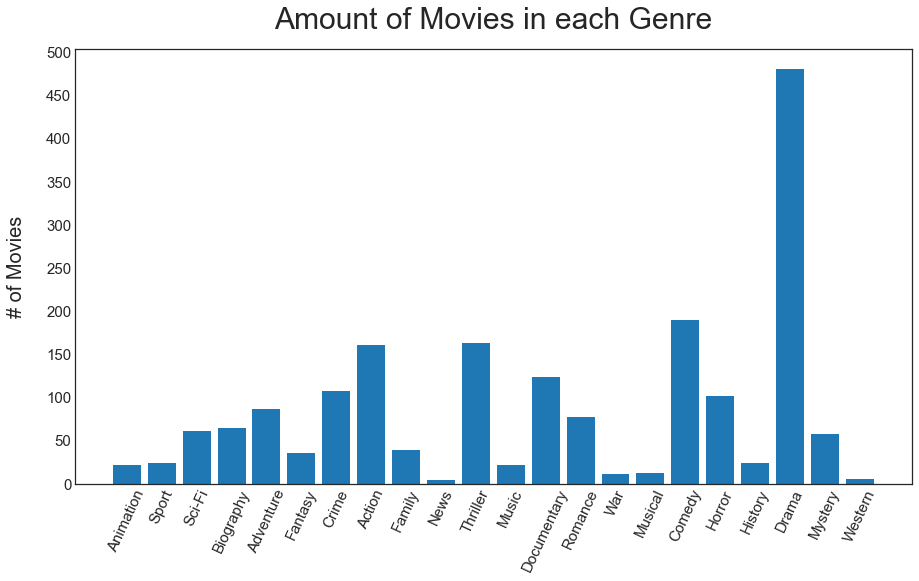

In [29]:
#plotted the frequency of each genre in dataset

fig, ax = plt.subplots(figsize=(15,8))

ax.bar(range(len(genre_columns)), genre_amt)

ax.set_title('Amount of Movies in each Genre', fontsize=30, pad=20)

ax.set_xticks(range(0,22,1))
ax.set_xticklabels(genre_columns, rotation=65, fontsize=15)

ax.set_yticks(range(0,550,50))
ax.set_yticklabels(range(0,550,50), fontsize=15)
ax.set_ylabel('# of Movies', fontsize=20)
ax.yaxis.labelpad = 20

plt.show()

#### Outliers

In this part, we used the median and mean to see the best way to deal with outliers

85.0
59.5


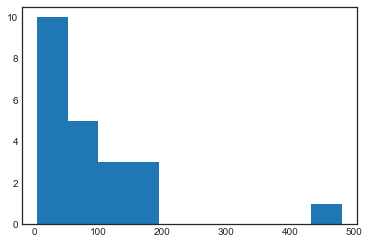

In [30]:
import numpy as np

genre_amt = np.array(genre_amt)

mean = np.mean(genre_amt)
median = np.median(genre_amt)

print(mean)
print(median)

plt.hist(genre_amt)
plt.show()

##### Outliers Continued

After examining the mean, the median, and the histogram, we dealt with small frequent genres (<20) by grouping them into one genre called 'Other'. Genres greater than 20 but less than the median were grouped with similar genres. Example: Sci-Fi and Fantasy were grouped together to form the genre Sci-Fi/Fanatasy.

In [31]:
def other_genre(genre):
    
    """
    Function loops through the list values in the genre column.
    Returns 1 if it genre (<20 frequency) in list
    Else returns 0
    
    """
    if (('News' in genre) or ('Sport' in genre) or ('Music' in genre) or 
        ('War' in genre) or ('Western' in genre) or ('Musical' in genre) or ('History' in genre)):
        return 1
    else:
        return 0

#created new binary column for 'Other' and dropped unnecessary columns
main_df['Other'] = main_df.genres.apply(lambda x: other_genre(x))
main_df.drop(columns=['News', 'Sport', 'Music', 'War', 'Western', 'Musical', 'History'], inplace=True)

In [32]:
#created function to merge animation and family movies into one genre

def family_animation(genre):
    if ('Family' in genre) or ('Animation' in genre):
        return 1
    else:
        return 0

#created new genre column called 'Family Friendly'
main_df['Family Friendly'] = main_df.genres.apply(lambda x: family_animation(x))

In [33]:
#created function to combine sci-fi and fantasy genre
def scifi_fantasy(genre):
    if 'Sci-Fi' in genre or 'Fantasy' in genre:
        return 1
    else:
        return 0

#created new column for sci-fi/fantasy movies
main_df['Sci-Fi/Fantasy'] = main_df.genres.apply(lambda x: scifi_fantasy(x))

In [34]:
def mystery_thriller(genre):
    if ('Mystery' in genre) or ('Thriller' in genre):
        return 1
    else:
        return 0
main_df['Mystery/Thriller'] = main_df.genres.apply(lambda x: mystery_thriller(x))

#### Cleaning the New Manipulated Data

In [35]:
#dropped more unnecessary columns
main_df.drop(columns=['Sci-Fi', 'Family', 'Animation', 'Fantasy', 'Mystery', 'Thriller'], inplace=True)

In [36]:
#updated genre list

genre_columns.remove('War')
genre_columns.remove('News')
genre_columns.remove('Sci-Fi')
genre_columns.remove('Sport')
genre_columns.remove('History')
genre_columns.remove('Western')
genre_columns.remove('Family')
genre_columns.remove('Animation')
genre_columns.remove('Music')
genre_columns.remove('Musical')
genre_columns.remove('Fantasy')
genre_columns.remove('Thriller')
genre_columns.remove('Mystery')

genre_columns.append('Family Friendly')
genre_columns.append('Sci-Fi/Fantasy')
genre_columns.append('Other')
genre_columns.append('Mystery/Thriller')

#### Recreating Genre Frequency Chart

In [37]:
#creating an updated genre_amt list using updated genre_collumns list
genre_amt = []

for i in genre_columns:
    num_genre = main_df[i].sum()
    genre_amt.append(num_genre)

#created a dictonary with two updated lists
genre_dct = dict(zip(genre_columns, genre_amt))

#created a dictonary using the two lists
genre_df = pd.DataFrame(data=genre_dct, index=range(1))
genre_df = genre_df.transpose()
genre_df[0].sort_values(ascending=False)

Drama               480
Comedy              190
Mystery/Thriller    188
Action              161
Documentary         123
Crime               107
Horror              102
Other                97
Sci-Fi/Fantasy       94
Adventure            86
Romance              77
Biography            65
Family Friendly      58
Name: 0, dtype: int64

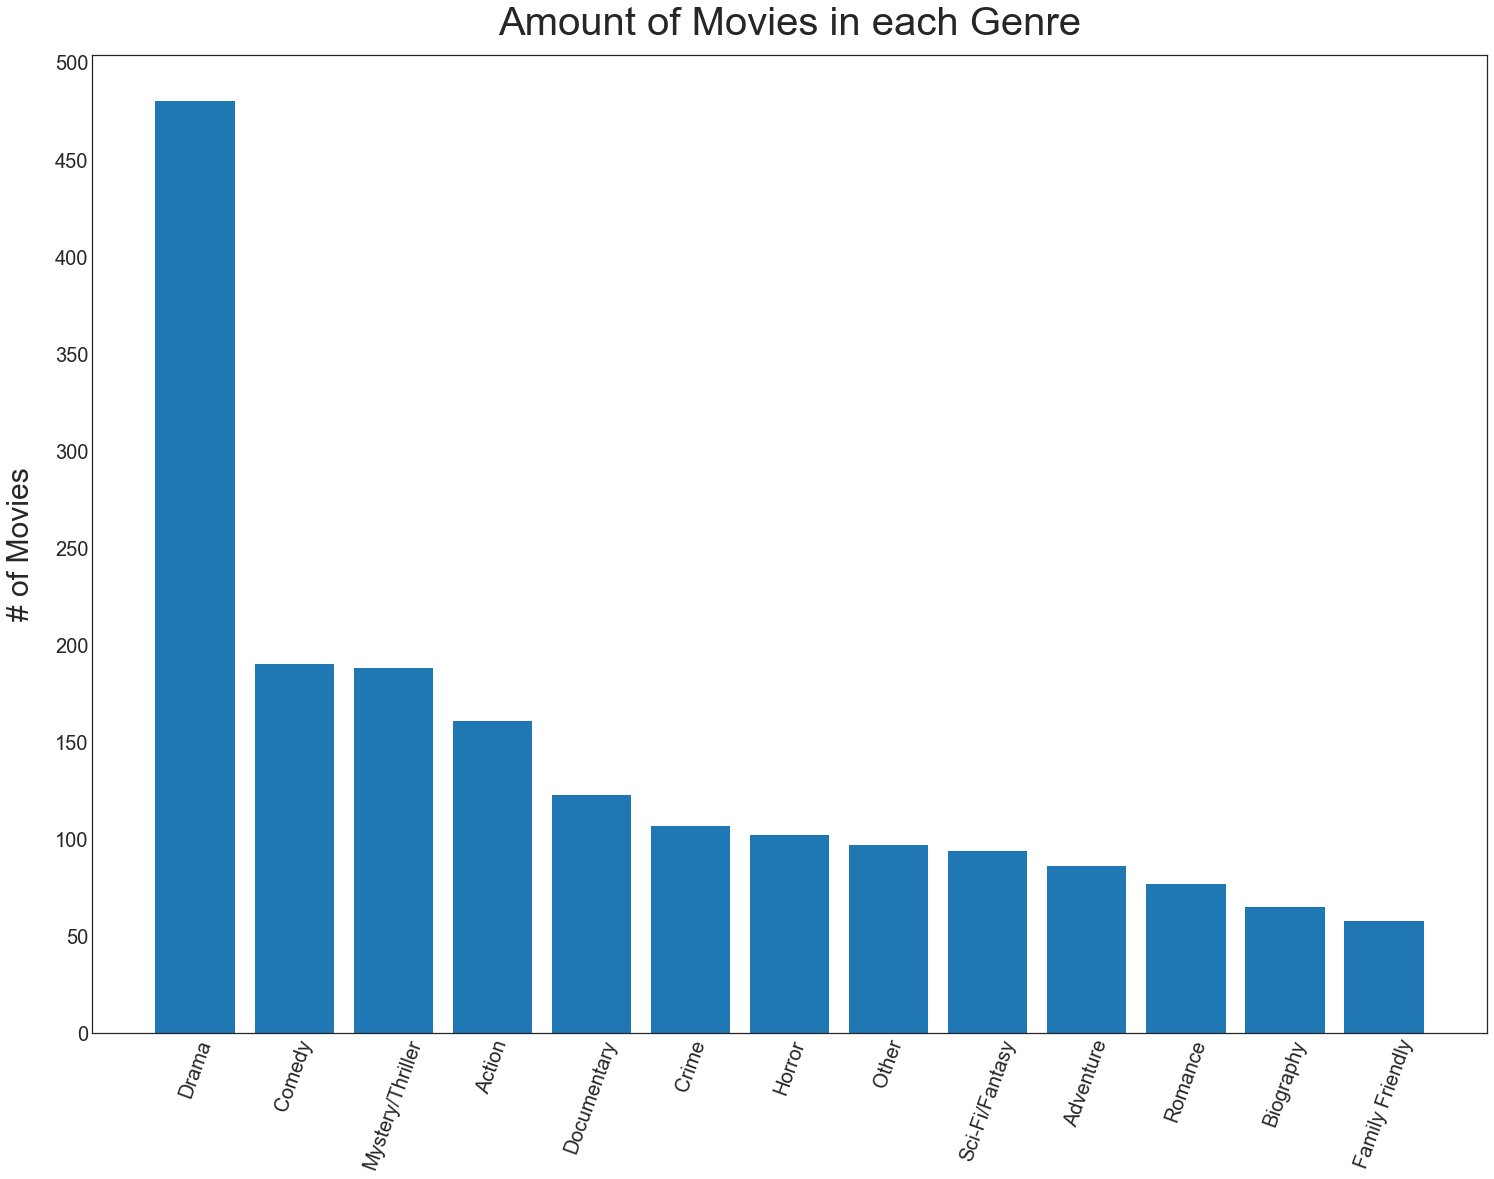

In [38]:
#plotted an updated genre frequency bar chart
fig, ax = plt.subplots(figsize=(25,18))

ax.bar(genre_df[0].sort_values(ascending=False).index, genre_df[0].sort_values(ascending=False))
ax.set_title('Amount of Movies in each Genre', fontsize=40, pad=20)
ax.set_xticks(range(0,13,1))
ax.set_xticklabels(genre_df[0].sort_values(ascending=False).index, rotation=70, fontsize=20)
ax.set_yticks(range(0,550,50))
ax.set_yticklabels(range(0,550,50), fontsize=20)
ax.set_ylabel('# of Movies', fontsize=30)
ax.yaxis.labelpad = 20

plt.savefig('chart_pics/frequent_genres.png')

plt.show()

### ROI Analysis of Each Genre

In this section, we analyzed the average return on investment for each genre to see if which movie genres provided the higher ROI.

In [39]:
#created a list called groups that has dataframes grouped by all the genres in main_df 

groups = []

for i in genre_columns:
    i = main_df.groupby([i]).mean()
    groups.append(i)

len(groups)

13

##### Graphing each DataFrame in groups list

Each horizontal bar chart illustrates a comparison between in each genre's average ROI and the industry's average ROI

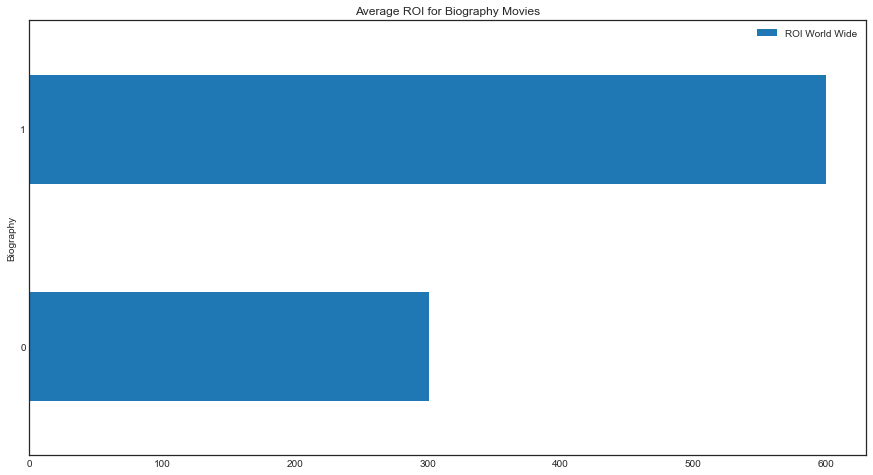

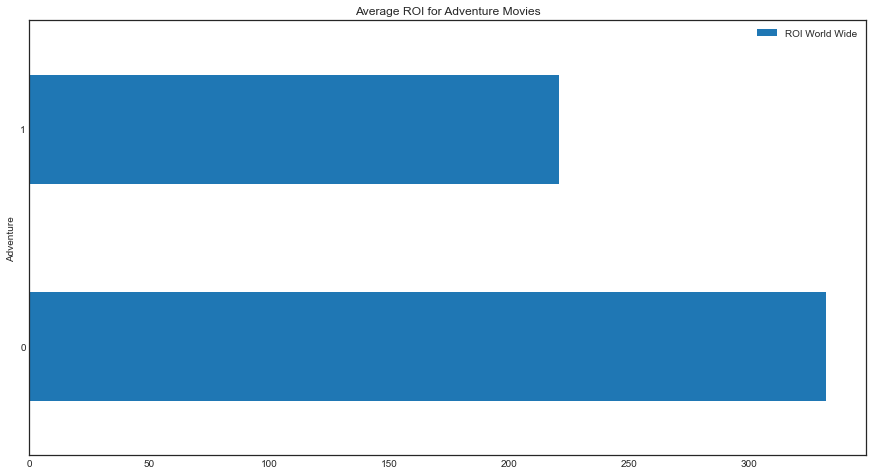

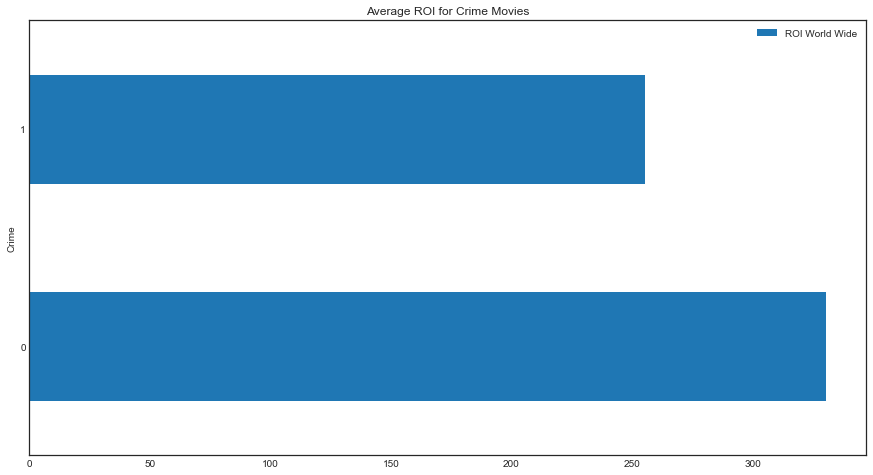

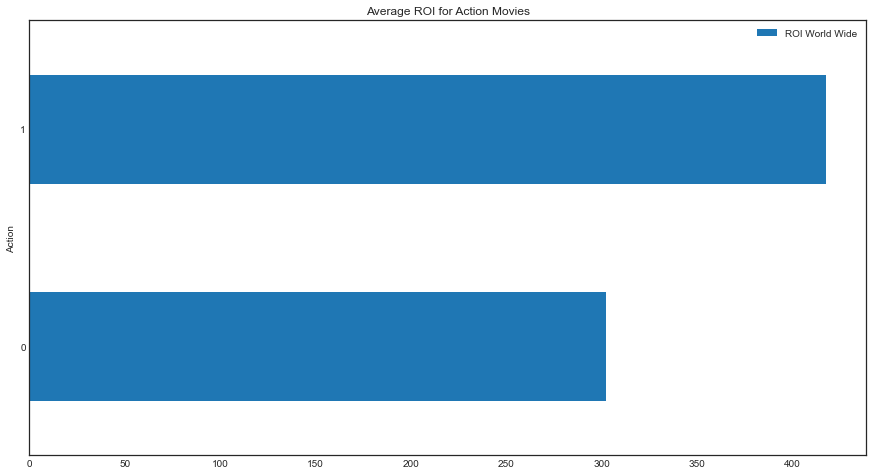

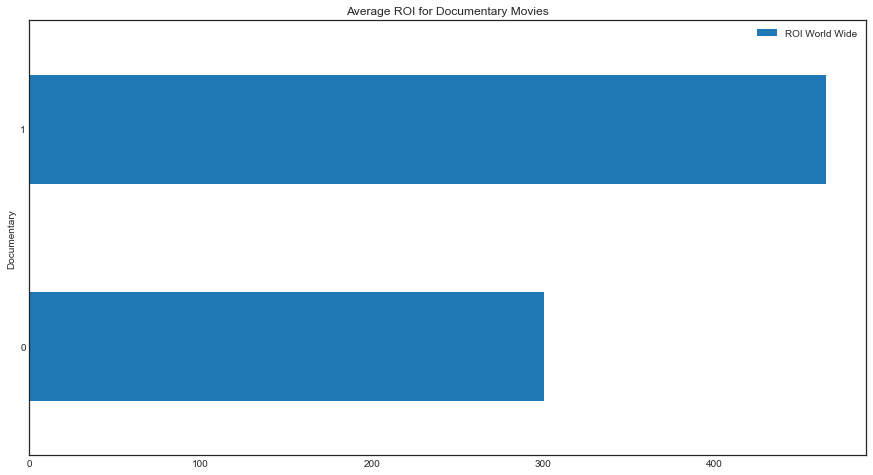

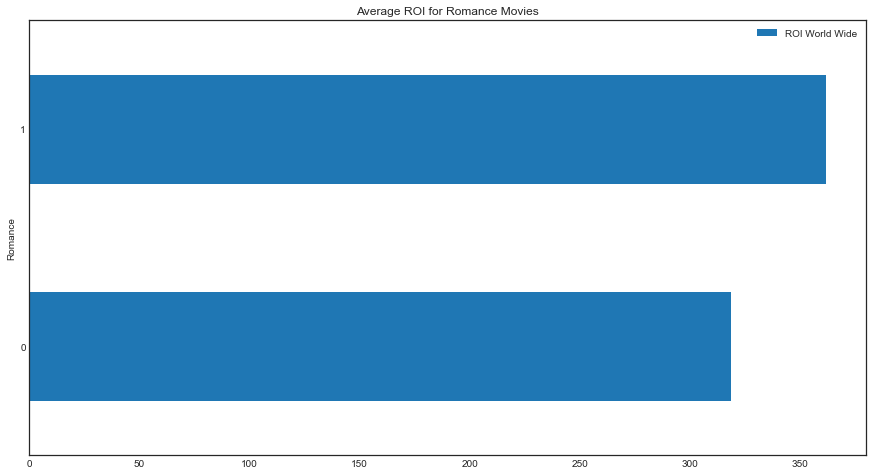

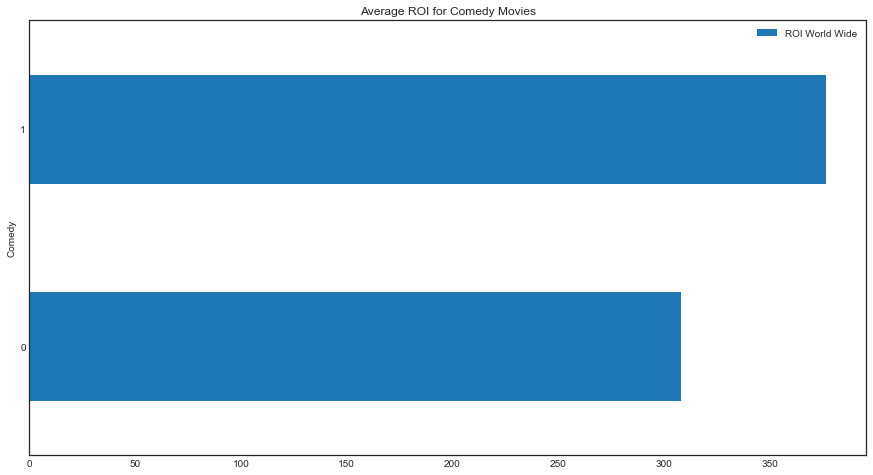

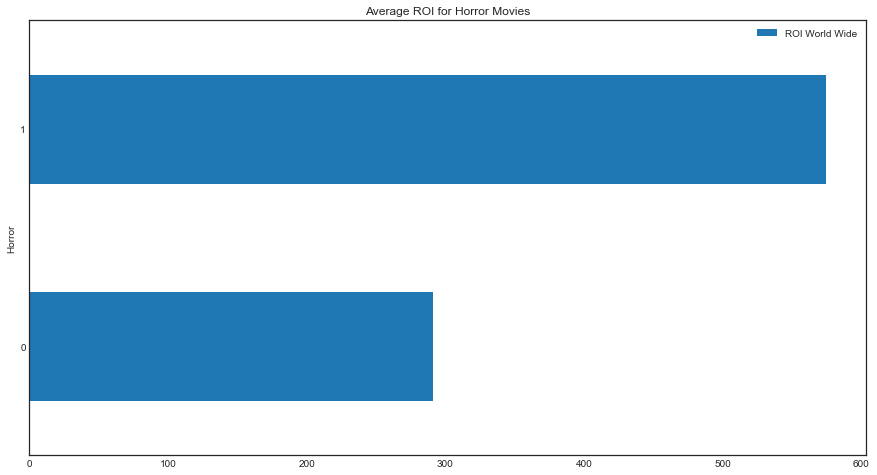

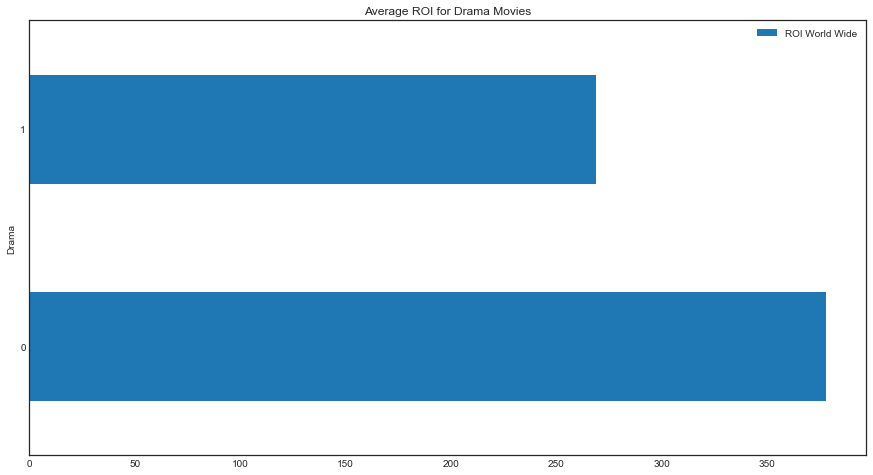

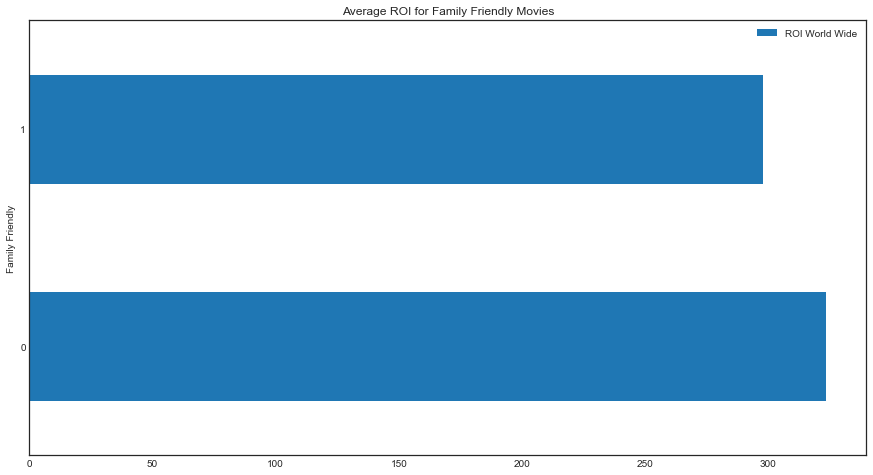

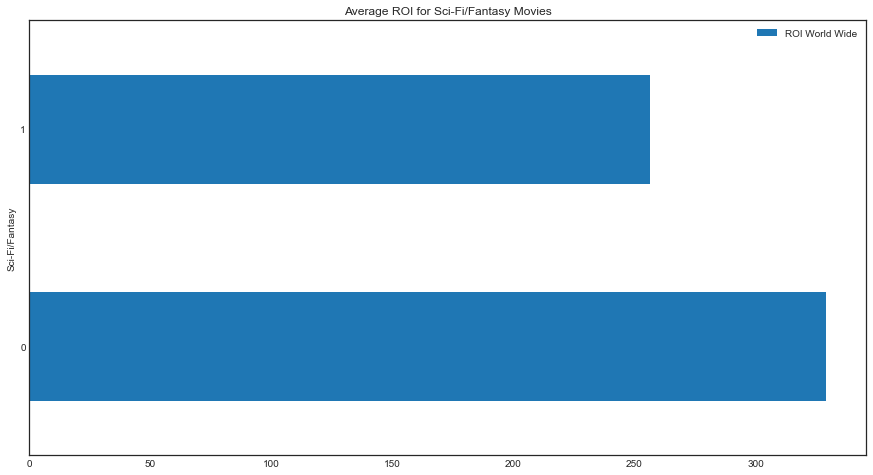

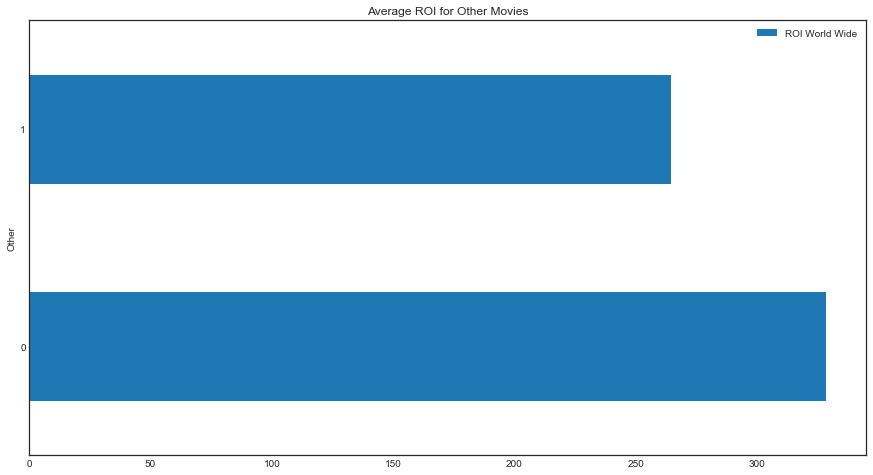

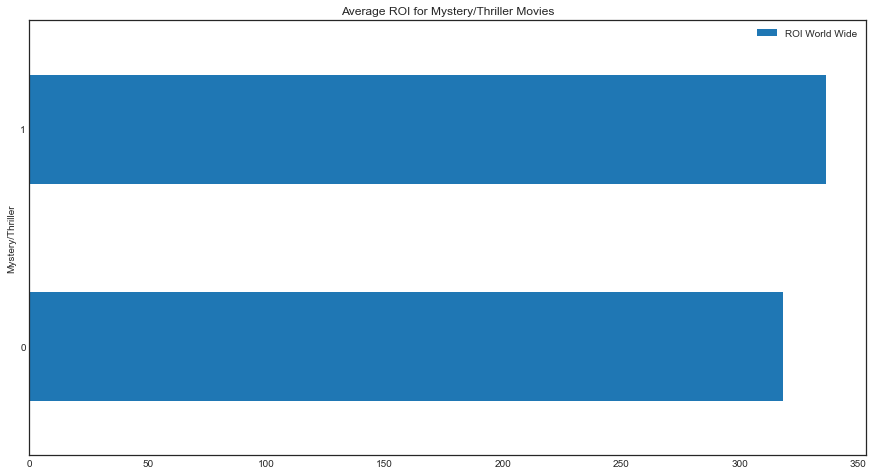

In [40]:
#empty dictionary to store average ROI for each genre
genres_dct = {}

#for loop which generates graphs for individaul genres and ROI
#adds genre and ROI to genres_dct
counter = 0
for i in genre_columns:
    

    groups[counter][['ROI_worldwide']].plot(kind='barh', figsize=(15,8))
    plt.legend(['ROI World Wide'])
    plt.title('Average ROI for {} Movies'.format(i))
    
    genres_dct[i] = list(groups[counter][['ROI_worldwide']].loc[1])[0]
                                                                
    plt.show()
    counter +=1

##### Creating a dataframe of genres and their average ROI

In [41]:
genres_dct

{'Biography': 600.2801257009237,
 'Adventure': 220.69631137428303,
 'Crime': 255.45067549695142,
 'Action': 417.7867574977618,
 'Documentary': 465.22109527957565,
 'Romance': 361.89123111187695,
 'Comedy': 376.74784506410145,
 'Horror': 574.770986077203,
 'Drama': 268.7528219917036,
 'Family Friendly': 297.97818395789113,
 'Sci-Fi/Fantasy': 256.554589429844,
 'Other': 264.4587822875103,
 'Mystery/Thriller': 336.49141622467585}

In [42]:
#created a dataframe using genres_dct

ROI = pd.DataFrame(data=genres_dct, index=range(1))
ROI = ROI.transpose()
ROI[0].sort_values(ascending=False).index

Index(['Biography', 'Horror', 'Documentary', 'Action', 'Comedy', 'Romance',
       'Mystery/Thriller', 'Family Friendly', 'Drama', 'Other',
       'Sci-Fi/Fantasy', 'Crime', 'Adventure'],
      dtype='object')

##### PLotting Average ROI by Genre Type ordered by greatest to least

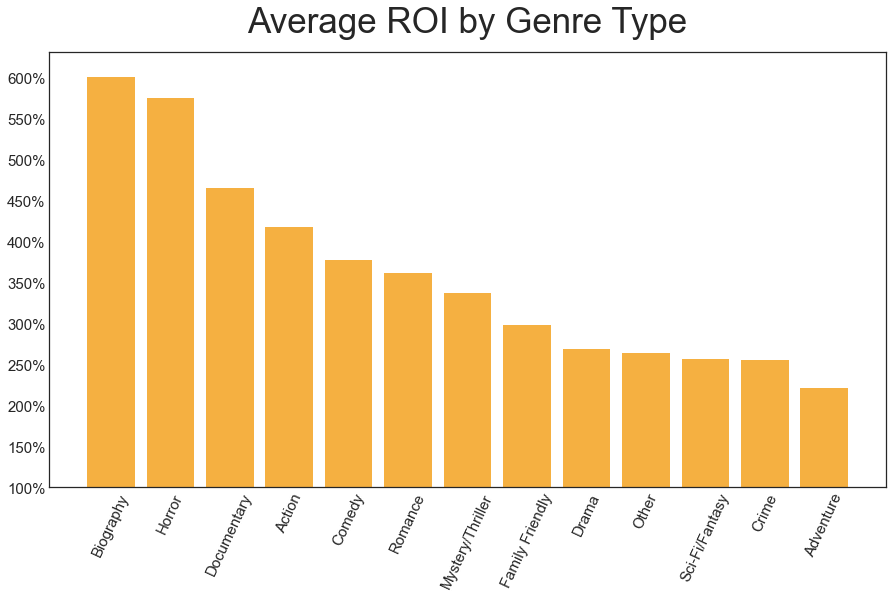

In [43]:
#plotting average ROI by genre type

fig, ax = plt.subplots(figsize=(15,8))

ax.bar(range(len(ROI[0].sort_values(ascending=False).index)), ROI[0].sort_values(ascending=False), color = '#F5B041')

ax.set_title('Average ROI by Genre Type', fontsize=35, pad=20)
ax.set_xticks(range(0,len(ROI.index),1))
ax.set_xticklabels(ROI[0].sort_values(ascending=False).index, rotation=65, fontsize=15)
ax.set_yticks(range(0,650,50))
ax.set_yticklabels(['{}%'.format(i) for i in range(0,650,50)], fontsize=15)
ax.set_ylim(100)

plt.savefig('chart_pics/avg_roi_genre.png')

plt.show()



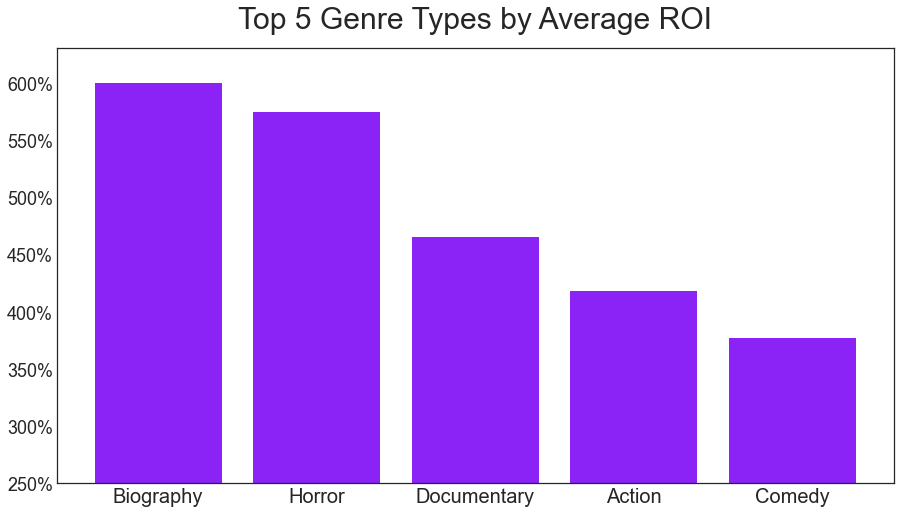

In [44]:
#created a series of the five genres with the highest average ROIs
top_5_genres = ROI[0].sort_values(ascending=False)[0:5]

#plotted average ROI for 5 best genres
fig, ax = plt.subplots(figsize=(15,8))

ax.bar(range(5), top_5_genres, color='#8B23F7')
ax.set_xticks(range(len(top_5_genres)))
ax.set_xticklabels(top_5_genres.index, fontsize=20)
ax.set_yticks(range(0,650, 50))
ax.set_yticklabels(['{}%'.format(i) for i in range(0,650,50)], fontsize=18)
ax.set_ylim(250)

ax.set_title('Top 5 Genre Types by Average ROI', fontsize=30, pad=20)


plt.show()

## ROI Analysis of Directors of Different Genres

In this section, we take the top five genres by ROI and group it by the five best directors by ROI in thos five genres.

In [45]:
#filterting dataframe

wanted_columns=['movie_id', 'averagerating', 'numvotes', 'num_of_genres',
                'ROI_worldwide', 'Biography', 'Comedy', 'Horror', 'Documentary', 'Action']

filtered_df = main_df.loc[:, wanted_columns]

In [46]:
#loaded in database with directors

directors= pd.read_sql("""

SELECT primary_name as director, movie_id
FROM persons
JOIN directors
    USING(person_id)
""", conn)

In [47]:
#merged directors with filtered_df

directors_ROI = filtered_df.merge(directors, on='movie_id')

In [48]:
#dropping duplicates
directors_ROI.drop_duplicates(subset=['movie_id'], inplace=True)

directors_ROI

movie_id  averagerating  numvotes  num_of_genres  ROI_worldwide  \
0     tt0339736            5.6      2420              1    1080.879909   
1     tt0426566            6.0        13              1      39.330956   
3     tt0436230            6.7        34              2   10075.949000   
5     tt0437086            7.5     88207              3     137.044727   
8     tt0443272            7.4    228701              3     320.532740   
...         ...            ...       ...            ...            ...   
2117  tt7961060            8.0     16465              3    1344.091235   
2118  tt7981492            4.3       971              2      50.172414   
2121  tt8450662            7.3        22              1     -56.882100   
2123  tt8632862            6.7     11628              1      33.074300   
2124  tt9024106            6.3      5945              2     201.793683   

      Biography  Comedy  Horror  Documentary  Action          director  
0             0       0       1            0       0      Andrew Getty  
1             0       0       0            0       0        Julio Bove  
3             0       0       1            0       0     Joaquin Perea  
5             0       0       0            0       1  Robert Rodriguez  
8             1       0       0            0       0  Steven Spielberg  
...         ...     ...     ...          ...     ...               ...  
2117          0       0       0            0       1  Tatsuya Nagamine  
2118          0       0       1            0       0      Rocky Soraya  
2121          0       0       0            1       0      Yaser Talebi  
2123          0       0       0            1       0     Michael Moore  
2124          1       0       0            0       0   Chuck Konzelman  

[930 rows x 11 columns]

<AxesSubplot:xlabel='director'>

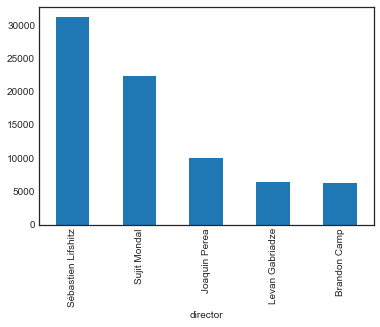

In [49]:
#created a dataframe grouped by director
grouped_director = directors_ROI.groupby(['director']).mean()

#plotted top 5 directors based on average ROI
grouped_director['ROI_worldwide'].sort_values(ascending=False)[0:5].plot(kind='bar')

### Director by Genre 

The next five bar charts are the top 5 directors by ROI in their respective genres.

In [50]:
#filtered a dataframe for best directors in the biography genre
biography = directors_ROI[directors_ROI.Biography == 1]
top_bio_directors = biography.groupby(['director']).mean()['ROI_worldwide'].sort_values(ascending=False)[0:5]

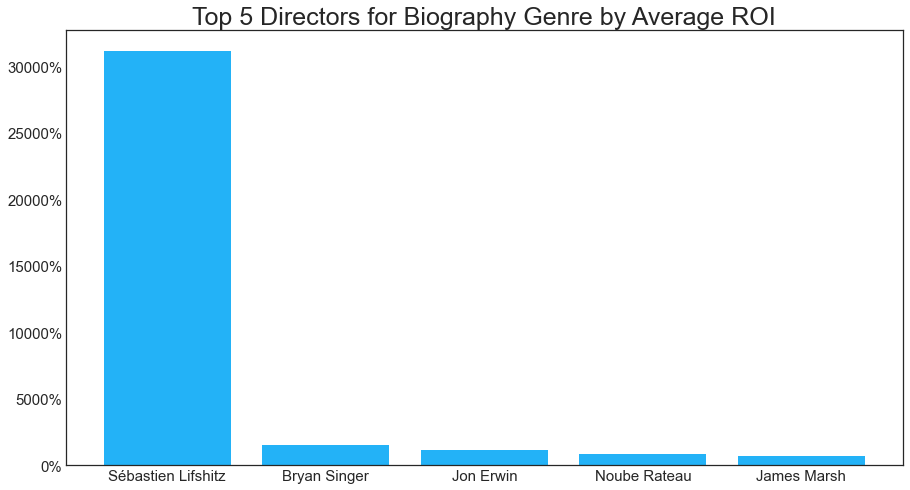

In [51]:
#plotting best directors in biography genre

fig, ax = plt.subplots(figsize=(15,8))

ax.bar(range(len(top_bio_directors)), top_bio_directors, color='#23B2F7')

ax.set_xticks(range(len(top_bio_directors)))
ax.set_xticklabels(top_bio_directors.index, fontsize=15)
ax.set_yticks(range(0,35000,5000))
ax.set_yticklabels(['{}%'.format(i) for i in range(0,35000,5000)], fontsize=15)

ax.set_title("Top 5 Directors for Biography Genre by Average ROI", fontsize=25)

plt.show()

In [52]:
#filtered a dataframe for best directors in the horror genre
horror = directors_ROI[directors_ROI.Horror == 1]
top_horror_directors = horror.groupby(['director']).mean()['ROI_worldwide'].sort_values(ascending=False)[0:5]

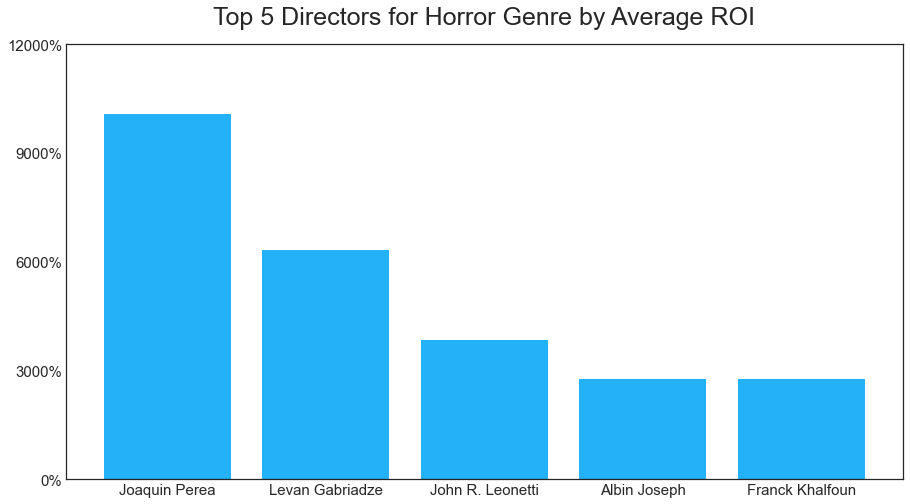

In [53]:
#plotted best directors for ROI in horror genre
fig, ax = plt.subplots(figsize=(15,8))

ax.bar(range(len(top_horror_directors)), top_horror_directors, color='#23B2F7')
ax.set_xticks(range(len(top_horror_directors)))
ax.set_xticklabels(top_horror_directors.index, fontsize=15)
ax.set_yticks(range(0,15000, 3000))
ax.set_yticklabels(['{}%'.format(i) for i in range(0,15000,3000)], fontsize=15)

ax.set_title("Top 5 Directors for Horror Genre by Average ROI", fontsize=25, pad=20)

plt.show()

In [54]:
#filtered a dataframe for best directors in documentary genre
documentary = directors_ROI[directors_ROI.Documentary == 1]
top_documentary_directors = documentary.groupby(['director']).mean()['ROI_worldwide'].sort_values(ascending=False)[0:5]

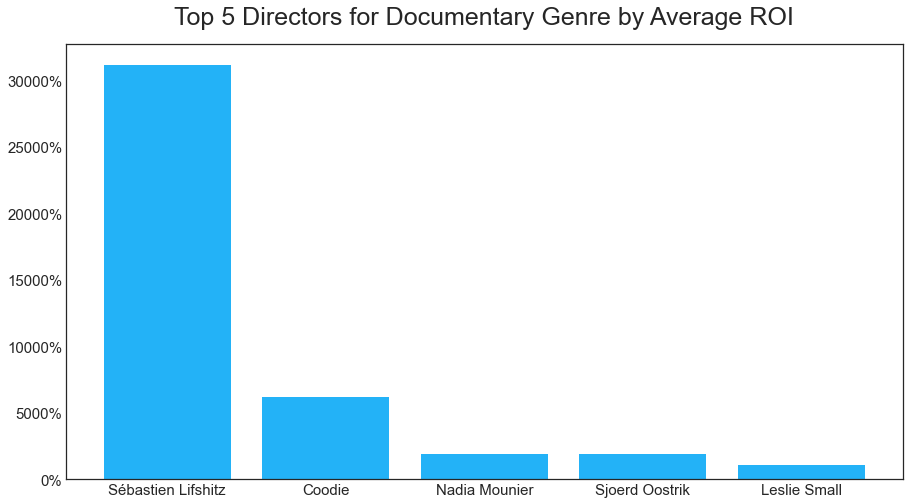

In [55]:
#plotted 5 best directors by ROI for documentary films
fig, ax = plt.subplots(figsize=(15,8))

ax.bar(range(len(top_documentary_directors)), top_documentary_directors, color='#23B2F7')
ax.set_xticks(range(len(top_documentary_directors)))
ax.set_xticklabels(top_documentary_directors.index, fontsize=15)
ax.set_yticks(range(0,35000, 5000))
ax.set_yticklabels(['{}%'.format(i) for i in range(0,35000,5000)], fontsize=15)
ax.set_title("Top 5 Directors for Documentary Genre by Average ROI", fontsize=25, pad=20)

plt.show()

In [56]:
#filtered a dataframe for best directors in mystery genre
comedy = directors_ROI[directors_ROI.Comedy == 1]
top_comedy_directors = comedy.groupby(['director']).mean()['ROI_worldwide'].sort_values(ascending=False)[0:5]
top_comedy_directors

director
Sujit Mondal       22400.000000
Jamie Buckner       5479.296120
Zhi-yu Ma           2617.924114
Adam Wingard        2588.717700
Damien Chazelle     2031.755815
Name: ROI_worldwide, dtype: float64

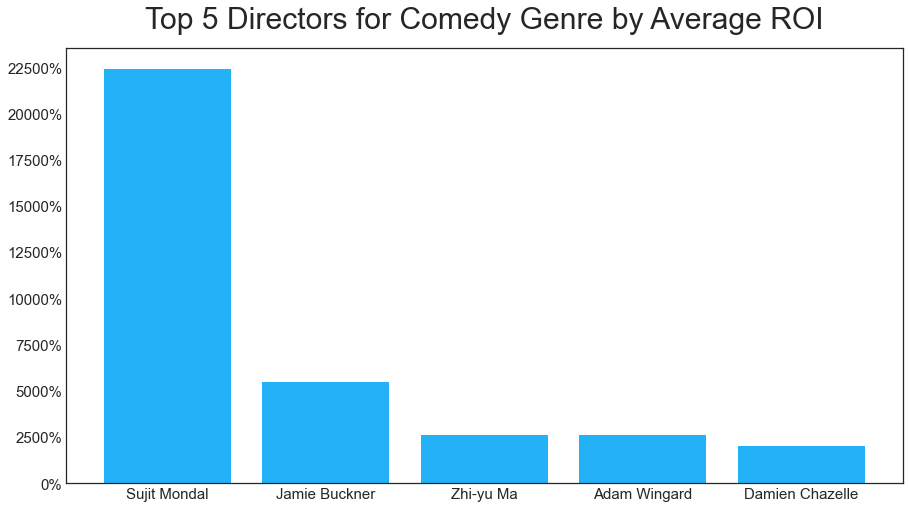

In [57]:
#plotted top 5 directors by ROI in mystery genre

fig, ax = plt.subplots(figsize=(15,8))

ax.bar(range(len(top_comedy_directors)), top_comedy_directors, color='#23B2F7')
ax.set_xticks(range(len(top_comedy_directors)))
ax.set_xticklabels(top_comedy_directors.index, fontsize=15)
ax.set_yticks(range(0,25000, 2500))
ax.set_yticklabels(['{}%'.format(i) for i in range(0,25000,2500)], fontsize=15)

ax.set_title("Top 5 Directors for Comedy Genre by Average ROI", fontsize=30, pad=20)

plt.show()

In [58]:
#filtered dataset for action movies by directors
action = directors_ROI[directors_ROI.Action == 1]
top_action_directors = action.groupby(['director']).mean()['ROI_worldwide'].sort_values(ascending=False)[0:5]

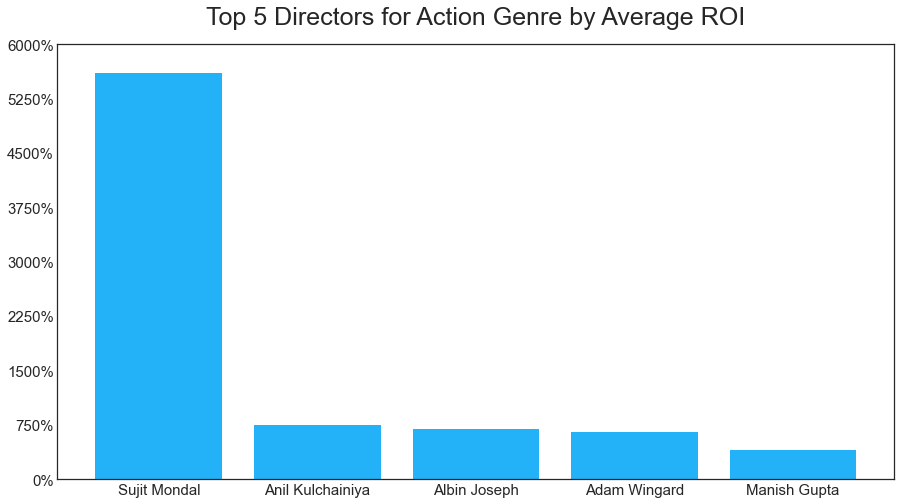

In [59]:
#plotted top 5 directors by ROI for action movies
fig, ax = plt.subplots(figsize=(15,8))

ax.bar(range(len(top_action_directors)), top_action_directors, color='#23B2F7')
ax.set_xticks(range(len(top_action_directors)))
ax.set_xticklabels(top_action_directors.index, fontsize=15)
ax.set_yticks(range(0,25000, 3000))
ax.set_yticklabels(['{}%'.format(i) for i in range(0,6500,750)], fontsize=15)

ax.set_title("Top 5 Directors for Action Genre by Average ROI", fontsize=25, pad=20)

plt.show()

# Conclusion

In the last part, we looped through the IMDB dataset to find movies that fit the genres to illustrate texamples to Microsfot Studio.

In [60]:
main_df.reset_index(inplace=True)

In [61]:
#list of films fitting biography and documentary genres

counter = 0
bio_doc_films = []
for i in main_df.genres:
    if ('Biography' in i) and ('Documentary' in i):
        bio_doc_films.append(main_df.loc[counter, 'title'])
    counter +=1

bio_doc_films

['The Joneses',
 'Iris',
 'Three Kings',
 'Inside Out',
 'Last Man Standing',
 'Born to Fly: Elizabeth Streb vs. Gravity',
 'The Lost City',
 'Step Up',
 'Ballerina',
 'Bambi',
 'All or Nothing',
 'Romeo Is Bleeding',
 'Jumper',
 'Virtuosity',
 'Limitless',
 'Bobby',
 'Yes',
 'Death Sentence']

In [62]:
#list of films fitting horror and action genres

counter = 0
horror_action_films = []
for i in main_df.genres:
    if ('Horror' in i) and ('Action' in i):
        horror_action_films.append(main_df.loc[counter, 'title'])
    counter +=1
horror_action_films

['Resident Evil: Afterlife',
 'I, Frankenstein',
 "You're Next",
 'The Forgotten',
 'Maniac',
 'The Hunted',
 'The Strangers',
 'Resident Evil: The Final Chapter',
 'Creature',
 'Tag',
 'Mandy',
 'The First Purge',
 'Outbreak']

In [63]:
#list of films fitting mystery and action genres

counter = 0
comedy_action_films = []
for i in main_df.genres:
    if ('Comedy' in i) and ('Action' in i):
        comedy_action_films.append(main_df.loc[counter, 'title'])
    counter +=1
comedy_action_films

['Shazam!',
 'Knight and Day',
 'The Bounty Hunter',
 'Killers',
 'Jackass 3D',
 'Ghostbusters',
 'Journey 2: The Mysterious Island',
 'Deadpool',
 'Baywatch',
 'Super',
 'Abduction',
 'Monster',
 'Middle Men',
 'Weekend',
 "You're Next",
 'Pain & Gain',
 'Pixels',
 'Khiladi 786',
 'The Hunted',
 'The Heat',
 'The Collector',
 'Rocky',
 'Thor: Ragnarok',
 'Free Fire',
 'Deadpool 2']

In [64]:
#list of films fitting mystery and horror genres

counter = 0
comedy_horror_films = []
for i in main_df.genres:
    if ('Comedy' in i) and ('Horror' in i):
        comedy_horror_films.append(main_df.loc[counter, 'title'])
    counter +=1
comedy_horror_films

['Vampires', 'Vamps', "You're Next", 'The Hunted', 'Water', 'Slender Man']

In [65]:
#list of films fitting mystery and documentary genres

counter = 0
comedy_documentary_films = []
for i in main_df.genres:
    if ('Comedy' in i) and ('Documentary' in i):
        comedy_documentary_films.append(main_df.loc[counter, 'title'])
    counter +=1
comedy_documentary_films

['Jackass 3D',
 'Kevin Hart: Laugh at My Pain',
 'Kevin Hart: Let Me Explain',
 'All or Nothing']

In [66]:
#list of films fitting horror and documentary genres

counter = 0
horror_documentary_films = []
for i in main_df.genres:
    if ('Horror' in i) and ('Documentary' in i):
        horror_documentary_films.append(main_df.loc[counter, 'title'])
    counter +=1
horror_documentary_films

[]

In [67]:
#list of films fitting biography and horror genres

counter = 0
biography_horror_films = []
for i in main_df.genres:
    if ('Horror' in i) and ('Biography' in i):
        biography_horror_films.append(main_df.loc[counter, 'title'])
    counter +=1
biography_horror_films

[]

In [68]:
#list of films fitting biography and mystery genres

counter = 0
comedy_bio_films = []
for i in main_df.genres:
    if ('Comedy' in i) and ('Biography' in i):
        comedy_bio_films.append(main_df.loc[counter, 'title'])
    counter +=1
comedy_bio_films

['Eddie the Eagle',
 'Love Ranch',
 'A Walk in the Woods',
 'Casino Jack',
 'The Sapphires',
 'Bernie',
 'All or Nothing',
 'A Street Cat Named Bob',
 'Florence Foster Jenkins',
 'Vice']

In [69]:
#list of films fitting action and documentary genres

counter = 0
doc_action_films = []
for i in main_df.genres:
    if ('Documentary' in i) and ('Action' in i):
        doc_action_films.append(main_df.loc[counter, 'title'])
    counter +=1
doc_action_films

['Jackass 3D',
 'The Return',
 'Born to Fly: Elizabeth Streb vs. Gravity',
 'The Hammer',
 'Down by Law',
 'Snow Day']

In [70]:
#list of films fitting biography and action genres

counter = 0
bio_action_films = []
for i in main_df.genres:
    if ('Action' in i) and ('Biography' in i):
        bio_action_films.append(main_df.loc[counter, 'title'])
    counter +=1
bio_action_films

['Machine Gun Preacher',
 'Born to Fly: Elizabeth Streb vs. Gravity',
 'The Masked Saint']